<b>Instructions</b></br>

1. read about human cough types - dry and wet, volunatry/ involuntary, etc. (reference: https://ieeexplore.ieee.org/document/9175986). Why cough is an important biomarker for respiratory disease? Do cough frequency vary with disease severity?
2. Select a sound classification dataset containing cough/ lungs/ heart sound e.g. ESC-50 dataset https://github.com/karolpiczak/ESC-50 </br>
3. make a new dataset with human cough sounds in one class and 4 other types of sounds e.g. sneezing, door knocking, raining, dog barking etc. in another class </br>
4. listen to the sounds and visualize some instances/ spectogram using the software Audacity https://www.audacityteam.org/ </br>
5. label the target class audio records as cough and the other class audio records as not cough (reference: https://www.researchgate.net/publication/336011335_Efficient_Online_Cough_Detection_with_a_Minimal_Feature_Set_Using_Smartphones_for_Automated_Assessment_of_Pulmonary_Patients </br>
6. split your dataset into train and test set </br>
7. develop a cough classification model using the training set and evaluate the model performance on test set</br>
8. Retrain another model using the same dataset with Teachable Machine Platform<br/>
9. Export the model and evaluate it in python on the test data</br>
10. compare your model performance with that of teachable machine<br/>
11. push your code to project-4 branch of the course Github and make a pull request.

### Step 0 - Install and import required libraries..

In [122]:
#!pip install librosa
#!pip install pandas
#!pip install tqdm
#!pip install tensorflow
#!pip install keras

In [10]:
#import wfdb
#from wfdb import processing
import os
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#import peakutils

### Step 1 - read about human cough types - dry and wet, volunatry/ involuntary, etc. (reference: https://ieeexplore.ieee.org/document/9175986). Why cough is an important biomarker for respiratory disease? Do cough frequency vary with disease severity?.

In [170]:
# Need to add these details from google search
# There are many different types of coughs with distinct characteristics that can help your doctor identify what underlying issue may be causing it. 
# If a cough brings up phlegm or mucus it is called a productive cough and could suggest pneumonia, bronchitis or the flu. 
# The color of the mucus can signal a more serious problem. You should see a doctor if your cough brings up yellowish-green phlegm or blood. 
# A cough that doesn’t produce mucus is called a dry or nonproductive cough. 

### Step 2 - Select a sound classification dataset containing cough/ lungs/ heart sound e.g. ESC-50 dataset https://github.com/karolpiczak/ESC-50
### Step 3 -  make a new dataset with human cough sounds in one class and 4 other types of sounds e.g. sneezing, door knocking, raining, dog barking etc. in another class

In [16]:
#ESC-50-master dataset was downloaded into ESC-50-master folder

In [17]:
fileList=pd.read_csv('ESC-50-master/meta/esc50.csv')

In [18]:
fileList

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [34]:
# Create Cough Category
category_cough = [
    'coughing'
]

In [35]:
# Create other Category
category_other = [
    'sneezing',
    'door_wood_knock',
    'rain',
    'dog'
]

In [36]:
from tqdm import tqdm

In [39]:
import shutil

In [42]:
# Copy the relevant files for model building
for index, row in tqdm(fileList.iterrows()):
    if row['category'] in category_cough:
        #print(row['category'])
        source = 'ESC-50-master/audio/'+row['filename']
        destination = 'data/cough/'+row['filename']
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        shutil.copyfile(source, destination)
        
    if row['category'] in category_other:
        #print(row['category'])
        source = 'ESC-50-master/audio/'+row['filename']
        destination = 'data/other/'+row['filename']
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        shutil.copyfile(source, destination)

2000it [00:00, 5104.58it/s]


In [43]:
# Made sure manually that 40 audio files for cough and 160 audio files for other sounds are present in data directory

### Step 4. listen to the sounds and visualize some instances/ spectogram using the software Audacity https://www.audacityteam.org/ </br>

In [44]:
# This is how cough sound looks - waveform and spectogram

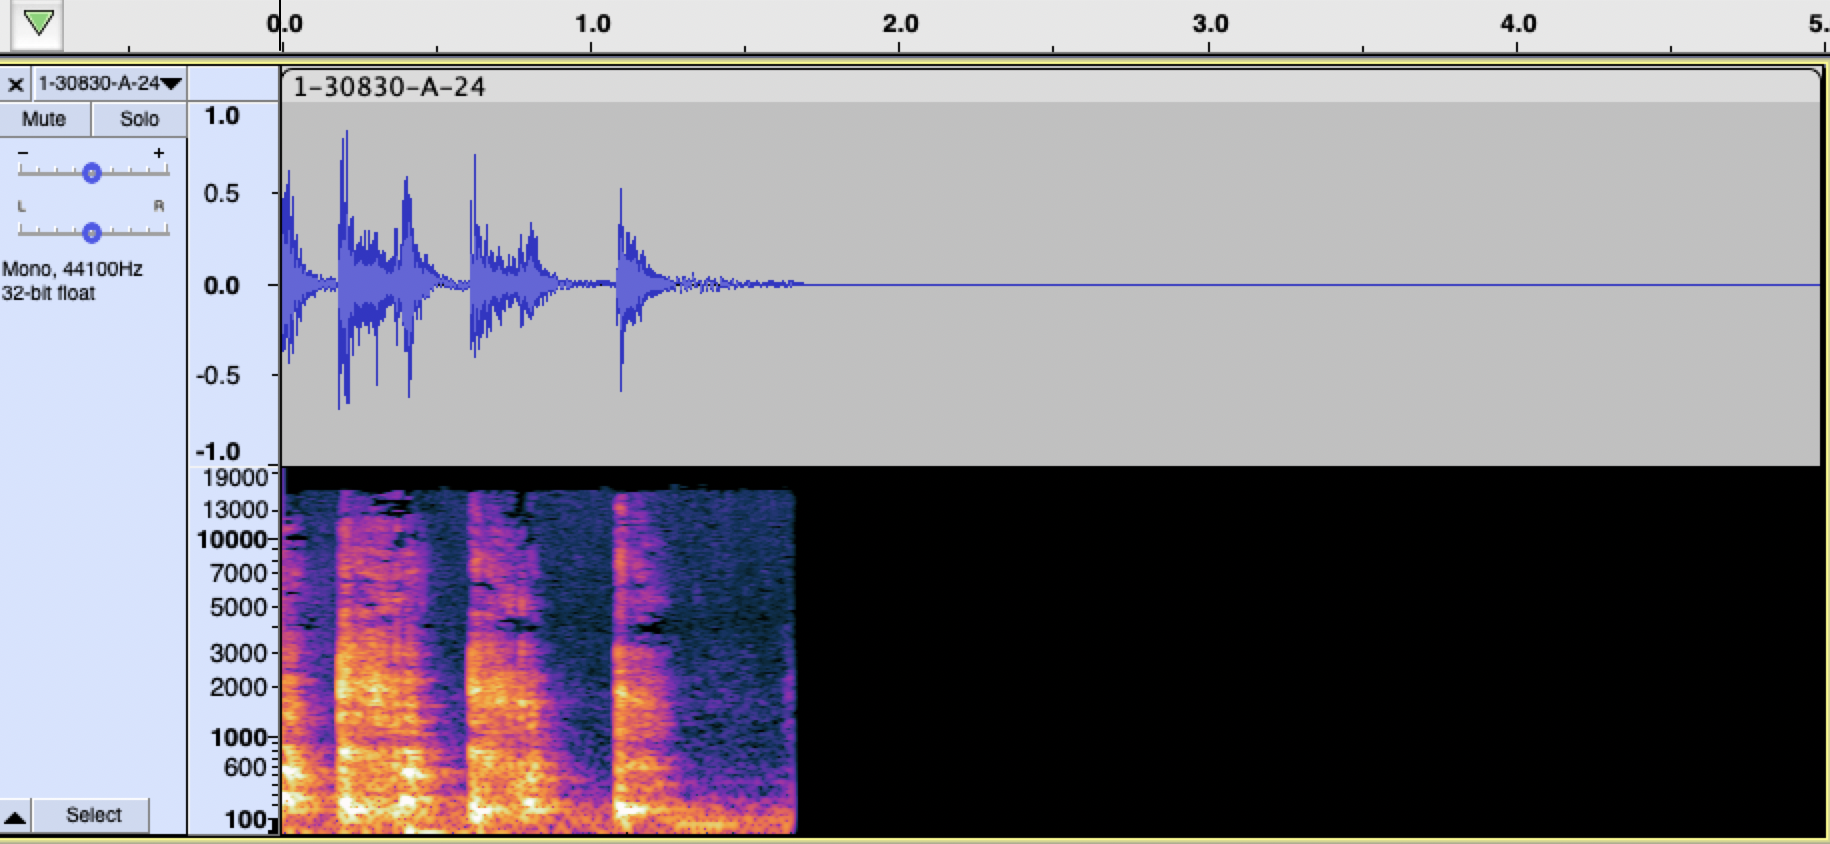

In [45]:
# This is how dog bark sound looks - waveform and spectogram

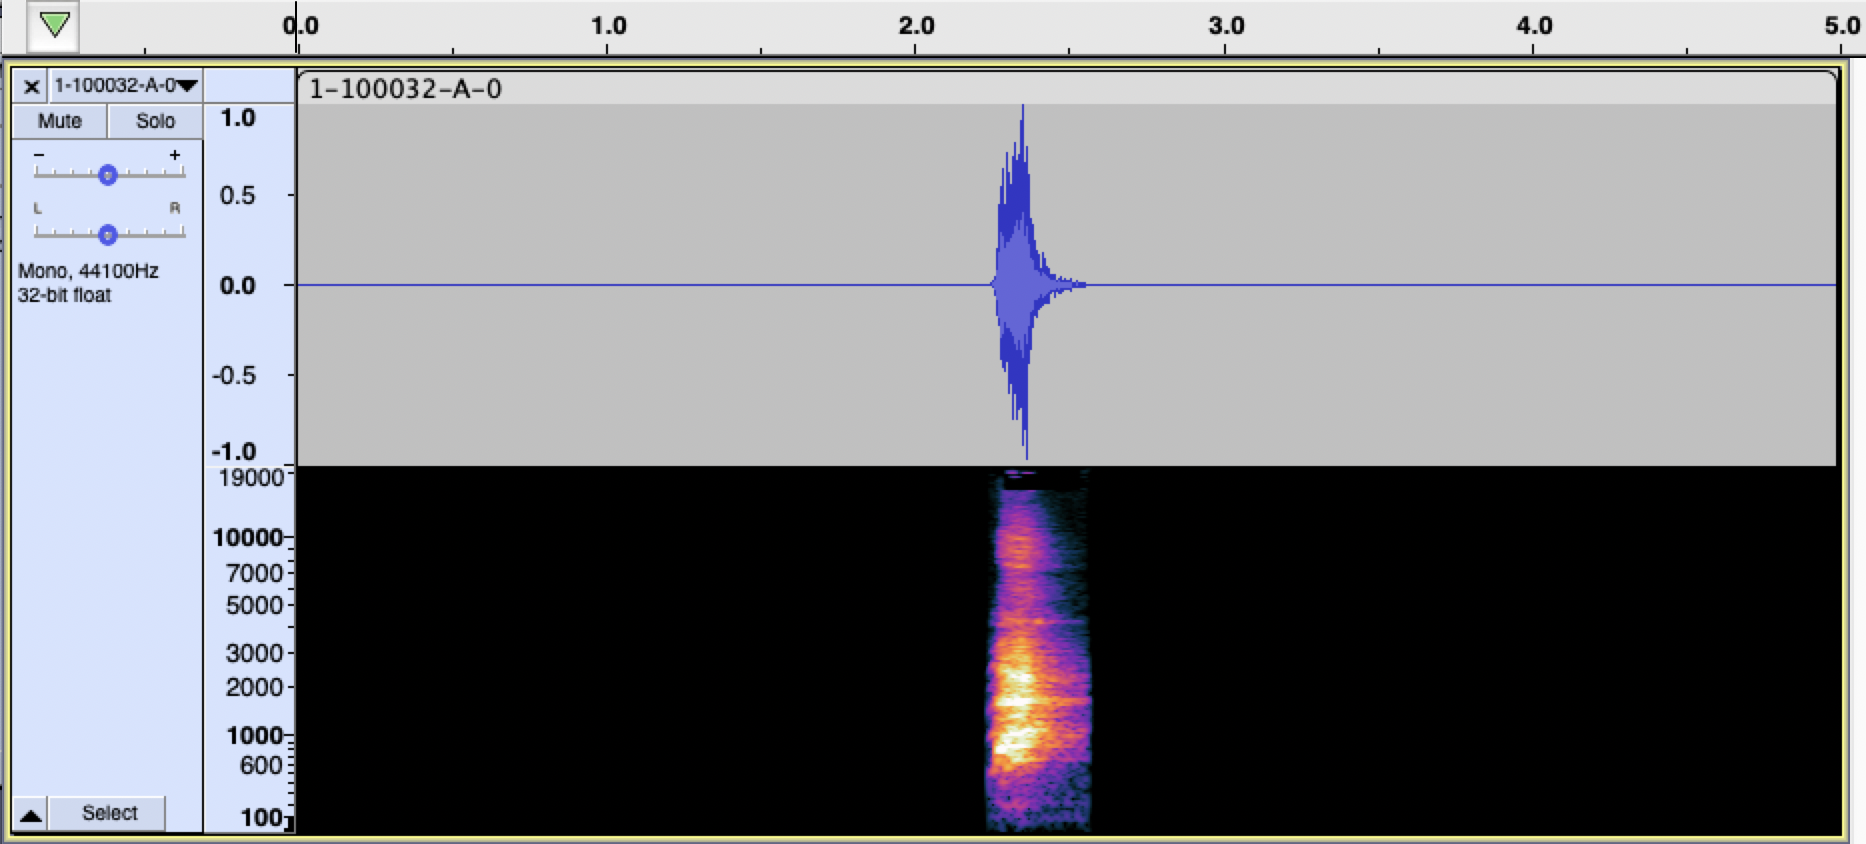

### Step 5. label the target class audio records as cough and the other class audio records as not cough (reference: https://www.researchgate.net/publication/336011335_Efficient_Online_Cough_Detection_with_a_Minimal_Feature_Set_Using_Smartphones_for_Automated_Assessment_of_Pulmonary_Patients </br>

In [46]:
# Let us first extract the mfcc features of the audio file using librosa library

In [76]:
import librosa

In [77]:
# get mfcc features from a sound file
def get_features(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    # mfcc (mel-frequency cepstrum)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [95]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for folder in next(os.walk('data/'))[1]:
    #print(folder)
    for filename in next(os.walk('data/'+folder))[2]:
        #print(filename)
        features_returned = get_features('data/'+folder+'/'+filename)
        extracted_features.append([features_returned,folder,filename])
        
#for index_num,row in tqdm(metadata.iterrows()):
#    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#    final_class_labels=row["class"]
#    data=features_extractor(file_name)
#    extracted_features.append([data,final_class_labels])

In [96]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label','filename'])
extracted_features_df.head()

,feature,label,filename
0,"[-712.55194, 30.920193, 2.780991, 0.013824622,...",cough,2-98676-A-24.wav
1,"[-307.3467, 54.572212, -6.7753873, -5.409676, ...",cough,5-184871-A-24.wav
2,"[-440.60336, 83.02065, 21.862593, 19.660618, 1...",cough,2-85292-A-24.wav
3,"[-444.37573, 70.005486, 1.9879241, 17.71561, 9...",cough,3-142604-A-24.wav
4,"[-351.8653, 70.79985, -17.100191, -2.4294312, ...",cough,2-123896-A-24.wav


In [97]:
extracted_features_df.tail()

,feature,label,filename
195,"[-119.42712, 84.22336, -22.795364, 33.70289, 4...",other,2-87781-A-10.wav
196,"[-43.26057, 43.979904, -56.57986, 22.040785, -...",other,1-21189-A-10.wav
197,"[-331.2578, 73.62106, -7.7734385, -2.6232133, ...",other,1-32318-A-0.wav
198,"[-297.17673, 141.54262, 13.331154, 16.154325, ...",other,5-250026-B-30.wav
199,"[-122.03897, 103.40765, -52.555744, -4.735318,...",other,3-180977-A-0.wav


In [98]:
#save the features into a file for future reference
extracted_features_df.to_csv('extracted_features_vikram.csv',index=False)

### Step 6. split your dataset into train and test set

In [114]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [115]:
X = np.array(extracted_features_df.feature.tolist())
y = np.array(extracted_features_df.label.tolist())
# encode classification labels
le = LabelEncoder()
# one hot encoded labels
yy = to_categorical(le.fit_transform(y))

In [116]:
#Split the dataset to Test and train
X_train, X_test, y_train, y_test = train_test_split(X,yy,test_size = 0.2, random_state = 42)

In [117]:
num_labels = yy.shape[1]

### Step 7. develop a cough classification model using the training set and evaluate the model performance on test set</br>

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.models import load_model

In [124]:
# define model
# create model architecture
model = Sequential()
model.add(Dense(256,input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256,input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

2021-12-10 20:57:30.326207: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [126]:
# compile the model 
model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [130]:
print("training for 100 epochs with batch size 32")
model.fit(X_train,y_train,batch_size= 32, epochs = 100, validation_data=(X_test,y_test))

training for 100 epochs with batch size 32
Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4972 - accuracy: 0.7375 - val_loss: 0.4774 - val_accuracy: 0.8750
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.7625 - val_loss: 0.4824 - val_accuracy: 0.8750
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5017 - accuracy: 0.7688 - val_loss: 0.4799 - val_accuracy: 0.8750
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7625 - val_loss: 0.4740 - val_accuracy: 0.8750
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.7750 - val_loss: 0.4693 - val_accuracy: 0.8750
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.8000 - val_loss: 0.4721 - val_accuracy: 0.8750
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5231 - accuracy: 0.7437 - val_loss: 0.4786 - val_

0it [00:00, ?it/s]

In [128]:
# save model to disk
model.save("keras_trained_mlp_vikram.h5")

In [129]:
# compute test loss and accuracy

# load model from disk
loaded_model = load_model("keras_trained_mlp_vikram.h5")

#evaluate on test data
score = loaded_model.evaluate(X_test,y_test)

test_loss = score[0]
test_accuracy = score[1]*100

print("Test loss",test_loss)
print("Test accuracy",test_accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8750
Test loss 0.47949329018592834
Test accuracy 87.5


### Step 8. Retrain another model using the same dataset with Teachable Machine Platform<br/>

In [161]:
#in order to train the model in Teachable Machine platform, let us restructure the data in same train, test sets and copy to different folders

In [162]:
X = np.array(extracted_features_df.filename.tolist())
y = np.array(extracted_features_df.label.tolist())

In [163]:
#Split the dataset to Test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)

In [164]:
# This will copy the train files in train folder under cough and other folder
n=0
for file in X_train:
    source = 'ESC-50-master/audio/'+file
    destination = 'data_for_teachable_machine/train/'+y_train[n]+'/'+file
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    shutil.copyfile(source, destination)
    n=n+1

In [165]:
# This will copy the test files in test folder under cough and other folder
n=0
for file in X_test:
    source = 'ESC-50-master/audio/'+file
    destination = 'data_for_teachable_machine/test/'+y_test[n]+'/'+file
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    shutil.copyfile(source, destination)
    n=n+1

In [160]:
## Next steps are done in teachable model by uploading the train files

### Step 9. Export the model and evaluate it in python on the test data

In [167]:
## Model was trained and exported at below location - 
# https://teachablemachine.withgoogle.com/models/J4ou6csFU/
#
# However I was not able to test this model within this python library

### Step 10. compare your model performance with that of teachable machine<br/>

### Step 11. push your code to project-4 branch of the course Github and make a pull request.

In [169]:
# The code was pushed and pull request made

### The End